# Multiple Linear Regression

In [2]:
#importing needed packages
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import pylab as pl

## Reading the data

In [9]:
df=pd.read_csv('FuelConsumption.csv')
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [10]:
cdf=df[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_CITY','FUELCONSUMPTION_HWY','FUELCONSUMPTION_COMB','CO2EMISSIONS']]
cdf.head(9)


,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,9.9,6.7,8.5,196
1,2.4,4,11.2,7.7,9.6,221
2,1.5,4,6.0,5.8,5.9,136
3,3.5,6,12.7,9.1,11.1,255
4,3.5,6,12.1,8.7,10.6,244
5,3.5,6,11.9,7.7,10.0,230
6,3.5,6,11.8,8.1,10.1,232
7,3.7,6,12.8,9.0,11.1,255
8,3.7,6,13.4,9.5,11.6,267


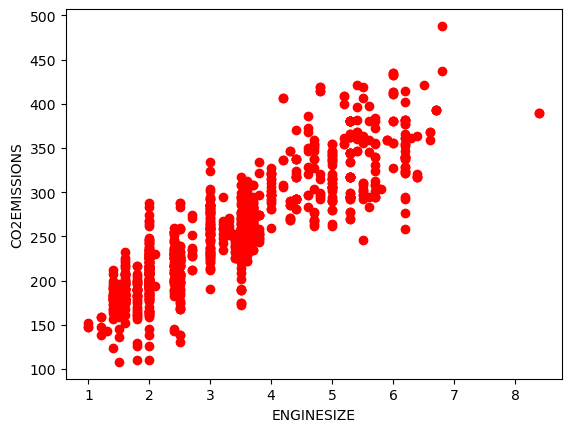

In [11]:
plt.scatter(cdf.ENGINESIZE,cdf.CO2EMISSIONS,color='red')
plt.xlabel('ENGINESIZE')
plt.ylabel('CO2EMISSIONS')
plt.show()

In [12]:
msk=np.random.rand(len(df))<0.8
train=cdf[msk]
test=cdf[~msk]

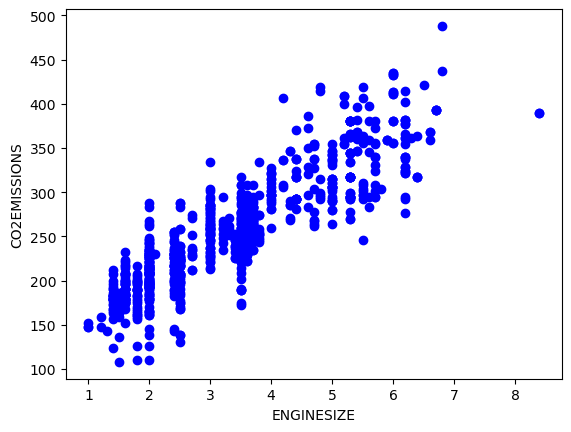

In [13]:
plt.scatter(train.ENGINESIZE,train.CO2EMISSIONS,color='blue')
plt.xlabel('ENGINESIZE')
plt.ylabel('CO2EMISSIONS')
plt.show()

## Multiple Regression Model

In [14]:
from sklearn import linear_model
regr=linear_model.LinearRegression()
# y=teta0+teta1X1+teta2X2+teta3X3
#we want to find out the coefficents
#teta1=ENGINESIZE , teta2=CYLINDERS , teta3=FUELCONSUMPTION_COMB
x=np.asanyarray(train[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB']])
y=np.asanyarray(train[['CO2EMISSIONS']])
regr.fit(x,y)
#the coefficeints
print('Coefficeints: ', regr.coef_)
#what is teta0?
print('Intercept:', regr.intercept_)


Coefficeints:  [[11.44837525  7.15006989  9.56620147]]
Intercept: [65.39760452]


In [21]:
#Using Ordinary Least Squares(OLS) for estimating the unknown parameters in a linear regression model. This model tries to minimize error.


## Prediction

In [15]:
y_hat=regr.predict(test[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB']])
x=np.asanyarray(test[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB']])
y=np.asanyarray(test[['CO2EMISSIONS']])
print('Residual sum of square: %.2f' % np.mean((y_hat-y)**2))

#Explained variance score: 1 is perfect predict
print('Variance Score: %.2f' %regr.score(x,y))

Residual sum of square: 626.82
Variance Score: 0.83


D:\anaconda\Lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(
